# Displaying the stacked map of polarisations

In [31]:
import pandas as pd
import healpy as hp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

## Importing the stacked data for no lensing

In [4]:
shape = "Output/nolens_shape.txt"
with open(shape, "r") as f:
    loaded_shape = tuple(map(int, f.read().strip().split(",")))

# Load the DataFrame from the CSV file
csv_filename = "Output/nolens.csv"
loaded_df = pd.read_csv(csv_filename)

# Convert the DataFrame back to a numpy array
loaded_flattened_array = loaded_df.values

# Reshape the array back to its original shape
nolens = loaded_flattened_array.reshape(loaded_shape)

## Importing the stacked data for lensed data

In [5]:
# Load the DataFrame from the CSV file
csv_filename = "Output/lensed.csv"
loaded_df = pd.read_csv(csv_filename)

# Convert the DataFrame back to a numpy array
loaded_flattened_array = loaded_df.values

# Reshape the array back to its original shape
lensed = loaded_flattened_array.reshape(loaded_shape)

## plots for temperature

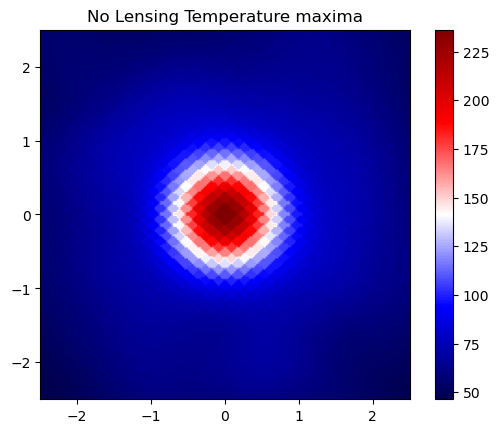

In [58]:
# no lens
plt.imshow(
    nolens[0, 0, :, :],
    extent=(-2.5, 2.5, -2.5, 2.5),
    origin="lower",
    cmap="seismic",
)
plt.colorbar()
plt.title("No Lensing Temperature maxima")
plt.show()

## plots for Q

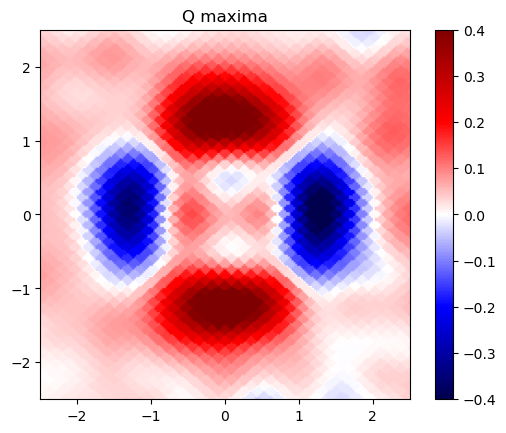

In [60]:
# no lens
plt.imshow(
    nolens[0, 1, :, :],
    extent=(-2.5, 2.5, -2.5, 2.5),
    origin="lower",
    cmap="seismic",
    vmin=-0.4,
    vmax=0.4,
)
plt.colorbar()
plt.title("Q maxima")
plt.show()

## U plot

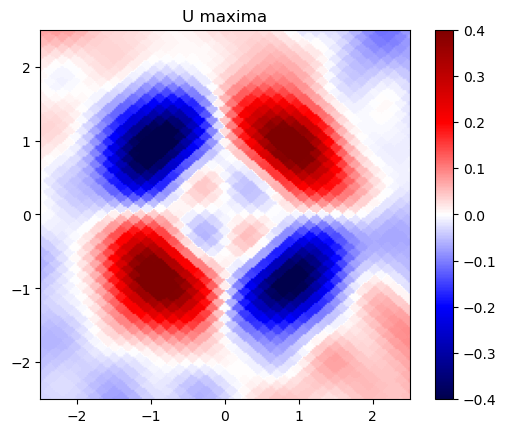

In [61]:
# no lens
plt.imshow(
    nolens[0, 2, :, :],
    extent=(-2.5, 2.5, -2.5, 2.5),
    origin="lower",
    cmap="seismic",
    vmin=-0.4,
    vmax=0.4,
)
plt.colorbar()
plt.title("U maxima")
plt.show()

## Qr map

In [81]:
# generating array of vectors
def pol_vec(Q, U):
    phi = 0.5 * np.arctan2(U, Q)
    P = np.sqrt(Q**2 + U**2)
    return phi, P


# Function to create inputs for vector map
def vectormap(step, Q, U):
    sample_indices = np.ix_(np.arange(0, 200, step), np.arange(0, 200, step))
    phi, P = pol_vec(Q[sample_indices], U[sample_indices])
    x, y = np.meshgrid(
        np.linspace(-2.5, 2.5, Q.shape[1] // step),
        np.linspace(-2.5, 2.5, Q.shape[0] // step),
    )
    u = P * np.cos(2 * phi - np.pi / 2)
    v = P * np.sin(2 * phi + np.pi / 2)
    return x, y, u, v

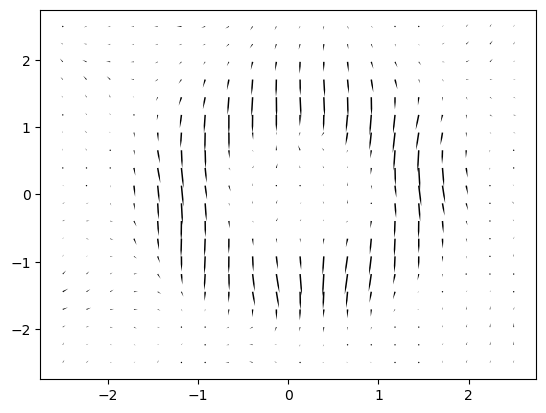

In [85]:
# max no lens
x, y, u, v = vectormap(10, nolens[1, 3, :, :], nolens[1, 4, :, :])
plt.quiver(x, y, u, v, scale=10, headwidth=1, color="black")
plt.show()